# Fake news detection using ML 
Sushwanth Reddy
17STUCHH010063

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Read datasets

In [58]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [59]:
fake.shape

(584, 2)

In [60]:
true.shape

(624, 2)

## Data cleaning and preparation

In [61]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [62]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(1208, 3)

In [63]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [64]:
# Check the data
data.head()

,Title,Text,target
0,File APK Daftar PPS Pemilu 2024,Hasil periksa fakta Agnes Amungkasari.Modus pe...,fake
1,KPU Ungkap Sejumlah Kendala Sempat Terjadi Saa...,Jakarta - Komisi Pemilihan Umum (KPU) RI menca...,true
2,Gibran Ajukan Mundur Dari Politik Gegara Hal M...,Hasil periksa fakta Siti Lailatul FitriyahUngg...,fake
3,Ijazah Calon Wakil Presiden Cuma Setara SMK,Hasil Periksa Fakta Vinanda (Relawan Mafindo)F...,fake
4,"""Quick Count"" Pilpres 2024 Litbang Kompas Data...",Pasangan calon presiden-calon wakil presiden (...,true


In [65]:
# Check
data.head()

,Title,Text,target
0,File APK Daftar PPS Pemilu 2024,Hasil periksa fakta Agnes Amungkasari.Modus pe...,fake
1,KPU Ungkap Sejumlah Kendala Sempat Terjadi Saa...,Jakarta - Komisi Pemilihan Umum (KPU) RI menca...,true
2,Gibran Ajukan Mundur Dari Politik Gegara Hal M...,Hasil periksa fakta Siti Lailatul FitriyahUngg...,fake
3,Ijazah Calon Wakil Presiden Cuma Setara SMK,Hasil Periksa Fakta Vinanda (Relawan Mafindo)F...,fake
4,"""Quick Count"" Pilpres 2024 Litbang Kompas Data...",Pasangan calon presiden-calon wakil presiden (...,true


In [66]:
data.head()

,Title,Text,target
0,File APK Daftar PPS Pemilu 2024,Hasil periksa fakta Agnes Amungkasari.Modus pe...,fake
1,KPU Ungkap Sejumlah Kendala Sempat Terjadi Saa...,Jakarta - Komisi Pemilihan Umum (KPU) RI menca...,true
2,Gibran Ajukan Mundur Dari Politik Gegara Hal M...,Hasil periksa fakta Siti Lailatul FitriyahUngg...,fake
3,Ijazah Calon Wakil Presiden Cuma Setara SMK,Hasil Periksa Fakta Vinanda (Relawan Mafindo)F...,fake
4,"""Quick Count"" Pilpres 2024 Litbang Kompas Data...",Pasangan calon presiden-calon wakil presiden (...,true


## Basic data exploration

target
fake    584
true    624
Name: Text, dtype: int64


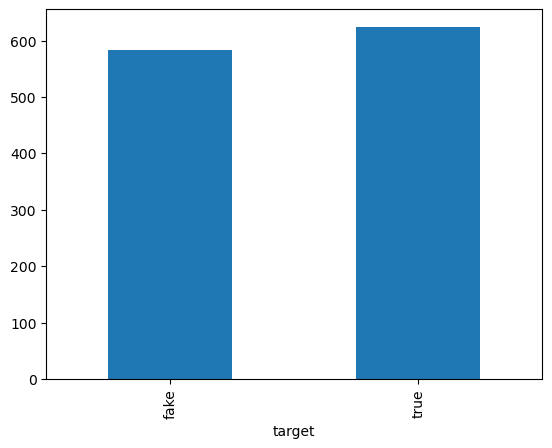

In [67]:
# How many fake and real articles?
print(data.groupby(['target'])['Text'].count())
data.groupby(['target'])['Text'].count().plot(kind="bar")
plt.show()

## Modeling

In [68]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [69]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['Text'], data.target, test_size=0.3, random_state=42)

# **Naive Bayes**




In [70]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 96.42%


In [71]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9641873278236914
Precision on testing set: 0.93717277486911
Recall on testing set: 0.9944444444444445
F1 Score on testing set: 0.9649595687331536


Confusion matrix, without normalization


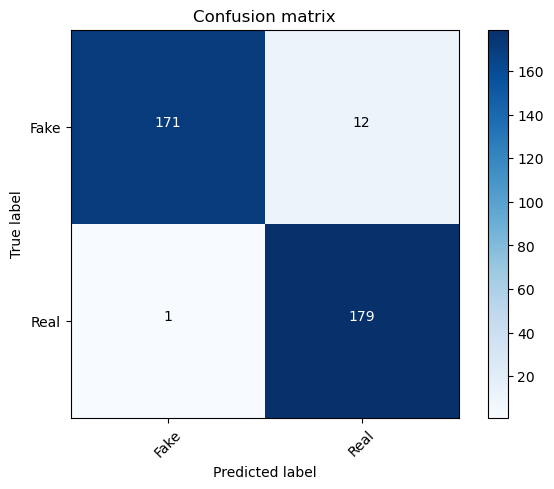

In [72]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [73]:

# Define the pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

# Define the hyperparameters grid to search
param_grid = {
    'vect__max_df': [0.75, 1.0],
    'vect__min_df': [1, 2],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'model__alpha': [0.1, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best model
best_model = grid_search.best_estimator_
prediction = best_model.predict(X_test)

# Print accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

# Store the accuracy in the dictionary
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100, 2)


Best parameters found:  {'model__alpha': 0.1, 'tfidf__use_idf': True, 'vect__max_df': 0.75, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
accuracy: 99.45%


In [74]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9944903581267218
Precision on testing set: 0.989010989010989
Recall on testing set: 1.0
F1 Score on testing set: 0.994475138121547


Confusion matrix, without normalization


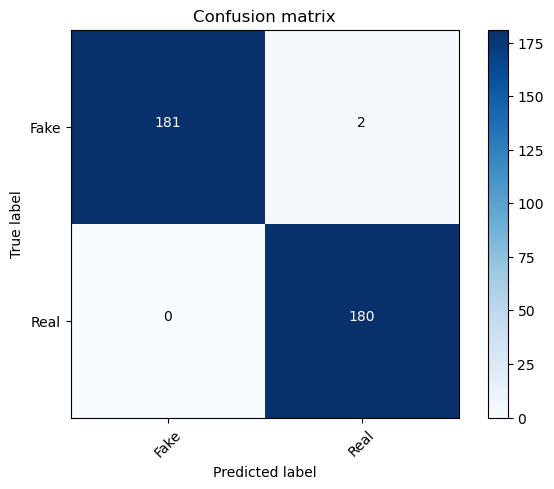

In [75]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression**

In [76]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.35%


In [77]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9834710743801653
Precision on testing set: 0.9728260869565217
Recall on testing set: 0.9944444444444445
F1 Score on testing set: 0.9835164835164836


Confusion matrix, without normalization


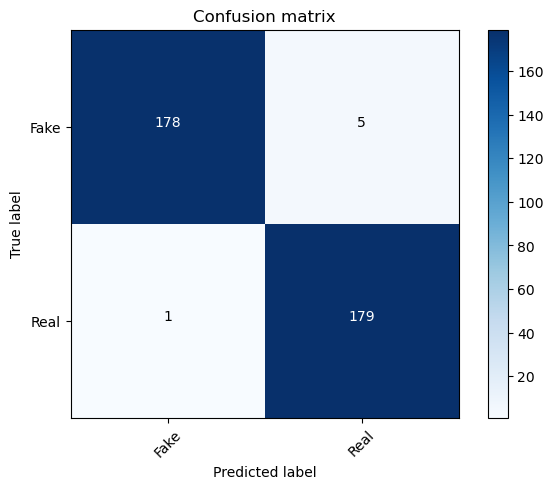

In [78]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [79]:

# Define the pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(solver='liblinear'))  # Use 'liblinear' for small datasets
])

# Define the hyperparameters grid to search
param_grid = {
    'vect__max_df': [0.75, 1.0],
    'vect__min_df': [1, 2],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'model__C': [0.1, 1.0, 10.0],  # Regularization strength
    'model__penalty': ['l1', 'l2']  # Penalty type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best model
best_model = grid_search.best_estimator_
prediction = best_model.predict(X_test)

# Print accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

# Store the accuracy in the dictionary
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100, 2)


Best parameters found:  {'model__C': 10.0, 'model__penalty': 'l2', 'tfidf__use_idf': True, 'vect__max_df': 0.75, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
accuracy: 99.45%


In [80]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9944903581267218
Precision on testing set: 0.9944444444444445
Recall on testing set: 0.9944444444444445
F1 Score on testing set: 0.9944444444444445


Confusion matrix, without normalization


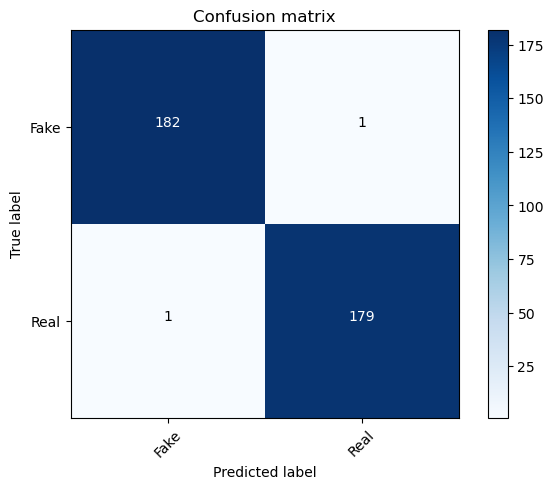

In [81]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.87%


In [83]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9586776859504132
Precision on testing set: 0.976878612716763
Recall on testing set: 0.9388888888888889
F1 Score on testing set: 0.9575070821529745


Confusion matrix, without normalization


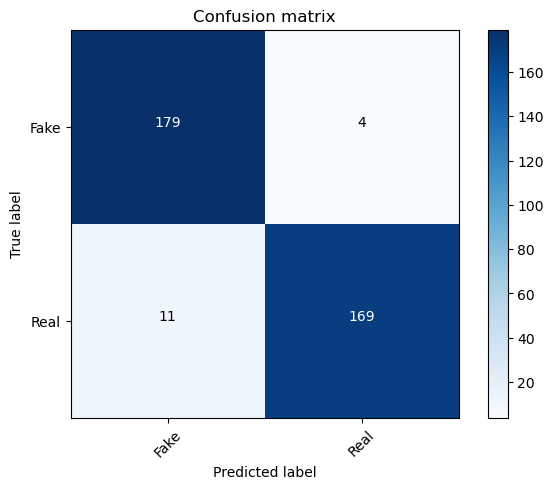

In [84]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [85]:

# Define the pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Define the hyperparameters grid to search
param_grid = {
    'vect__max_df': [0.75, 1.0],
    'vect__min_df': [1, 2],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__splitter': ['best', 'random'],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best model
best_model = grid_search.best_estimator_
prediction = best_model.predict(X_test)

# Print accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

# Store the accuracy in the dictionary
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100, 2)


Best parameters found:  {'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 20, 'model__splitter': 'random', 'tfidf__use_idf': False, 'vect__max_df': 1.0, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}
accuracy: 97.25%


In [86]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9724517906336089
Precision on testing set: 0.9722222222222222
Recall on testing set: 0.9722222222222222
F1 Score on testing set: 0.9722222222222222


Confusion matrix, without normalization


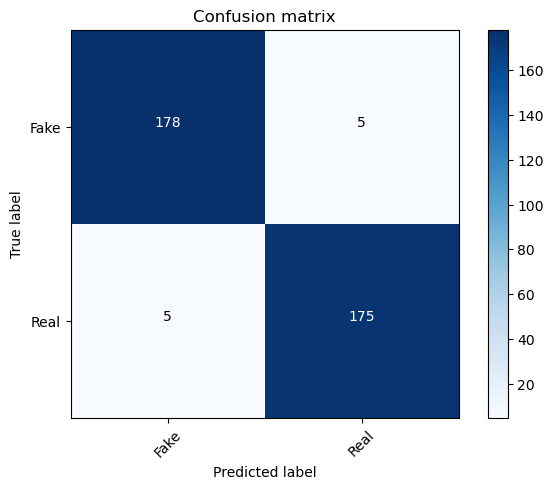

In [87]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM**

In [88]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



accuracy: 99.45%


In [89]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9944903581267218
Precision on testing set: 0.9944444444444445
Recall on testing set: 0.9944444444444445
F1 Score on testing set: 0.9944444444444445


Confusion matrix, without normalization


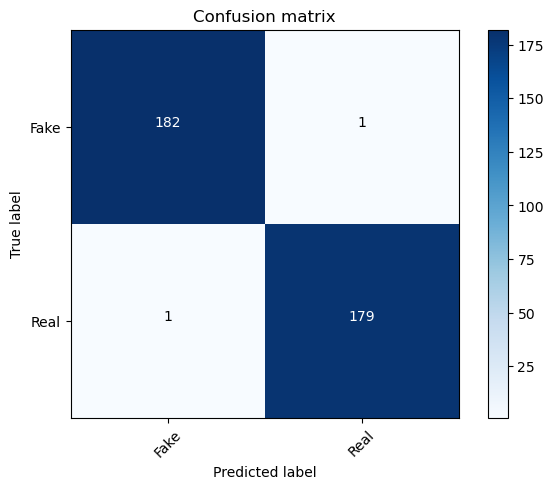

In [90]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [91]:

# Define the pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', svm.SVC())
])

# Define the hyperparameters grid to search
param_grid = {
    'vect__max_df': [0.75, 1.0],
    'vect__min_df': [1, 2],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'model__kernel': ['linear', 'rbf', 'poly'],  # Different kernels to try
    'model__C': [0.1, 1, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best model
best_model = grid_search.best_estimator_
prediction = best_model.predict(X_test)

# Print accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

# Store the accuracy in the dictionary
dct['SVM'] = round(accuracy_score(y_test, prediction)*100, 2)


Best parameters found:  {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear', 'tfidf__use_idf': True, 'vect__max_df': 0.75, 'vect__min_df': 2, 'vect__ngram_range': (1, 1)}
accuracy: 99.72%


In [92]:
print('Accuracy on testing set:', metrics.accuracy_score(y_test, prediction))
print('Precision on testing set:', metrics.precision_score(y_test, prediction, pos_label='true'))
print('Recall on testing set:', metrics.recall_score(y_test, prediction, pos_label='true'))
print('F1 Score on testing set:', metrics.f1_score(y_test, prediction, pos_label='true'))

Accuracy on testing set: 0.9972451790633609
Precision on testing set: 0.994475138121547
Recall on testing set: 1.0
F1 Score on testing set: 0.9972299168975068


Confusion matrix, without normalization


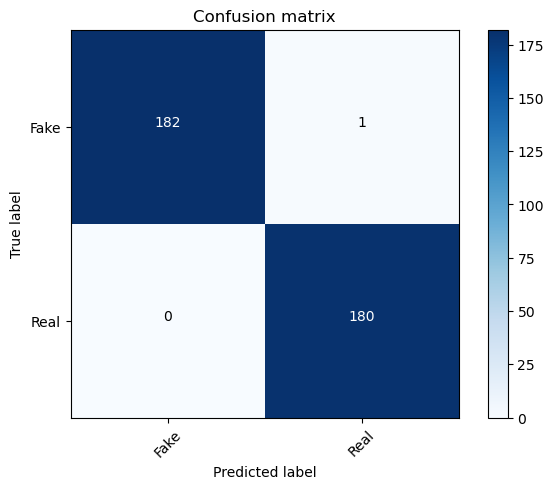

In [93]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

([<matplotlib.axis.YTick at 0x7f96410f7cd0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

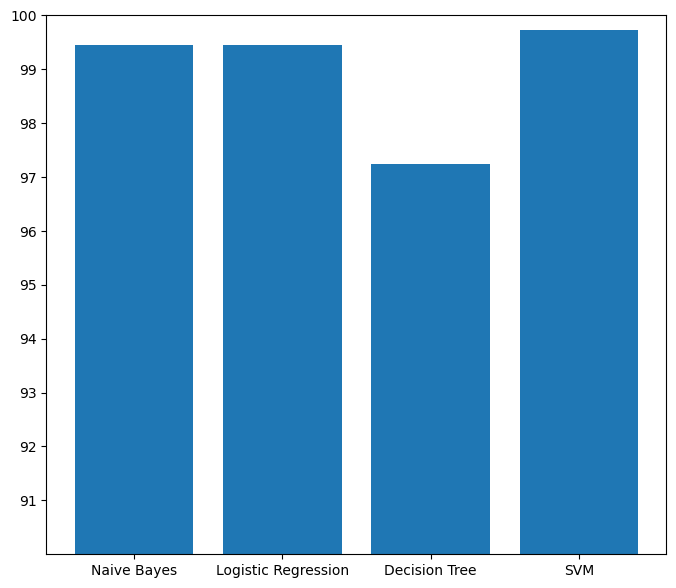

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))